# Advertising Works

TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
Buradan Sales Sütunu hedef yani y=df['Sales']. TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacaksınız ve Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız. Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv('advertising.csv')

In [28]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
df = df.dropna()

In [30]:
X = df[['TV', 'Radio', 'Newspaper']]
y= df['Sales']

In [31]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [32]:
train_pred = model.predict(X)


In [33]:
r2 = model.score(X, y)

In [34]:
mse = ((y - train_pred)**2).mean()

In [35]:
rmse = (mse)**0.5

In [36]:
print(f'R-kare: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

R-kare: 0.90
MSE: 2.78
RMSE: 1.67


In [37]:
print('Regresyon Katsayıları:')
print(f'TV: {model.coef_[0]:.2f}')
print(f'Radyo: {model.coef_[1]:.2f}')
print(f'Gazete: {model.coef_[2]:.2f}')

Regresyon Katsayıları:
TV: 0.05
Radyo: 0.19
Gazete: -0.00


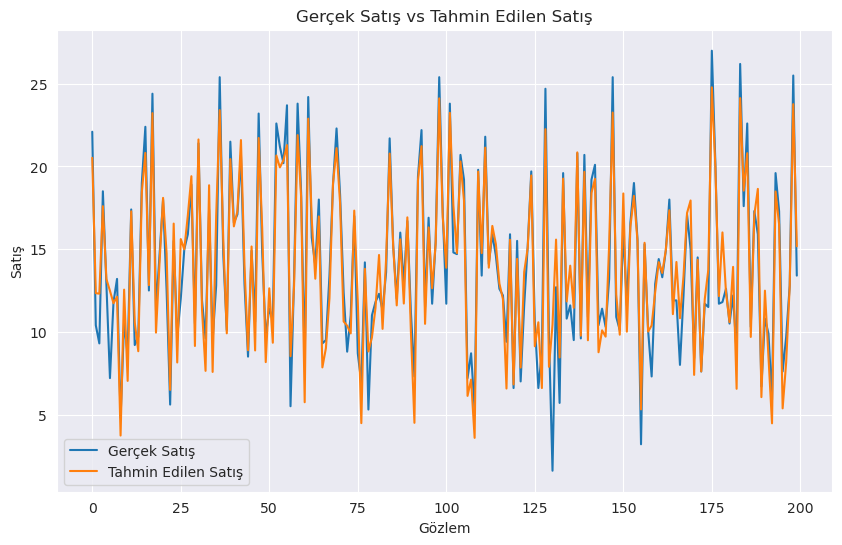

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Gerçek Satış')
plt.plot(train_pred, label='Tahmin Edilen Satış')
plt.xlabel('Gözlem')
plt.ylabel('Satış')
plt.title('Gerçek Satış vs Tahmin Edilen Satış')
plt.legend()
plt.show()